# NMDS
- https://dev.classmethod.jp/articles/mds-for-parks/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.braycurtis.html

---
## Agenda
1. **First Example (MDS)**
    1. Import libraries
    1. Create data
        - The distance between five main prefecture in Japan
    1. Create MDS class
    1. Apply MDS
1. **Second Example (NMDS)**
    1. Create data
    1. Calculate Bray Curtis Distance
    1. Create NMDS class
    1. Apply NMDS
1. **Export data for R**
---

## Import Libraries
- Using sklearn to execute MDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
"""↓ Library for nmds """
from sklearn import manifold

## Create Data
- Tokyo / Osaka / Fukuoka / Hokkaido / Tokushima

In [2]:
dist_japan = [[0, 401, 886, 835, 506],
              [401, 0, 486, 1060, 111],
              [886, 486, 0, 1421, 388],
              [835, 1060, 1421, 0, 1162],
              [506, 111, 388, 1162, 0]]

## Create MDS Class
- n_components : The number of scale we transform
- dissimilarity : "precomputed" or "euclidean"
    1. "precomputed" : The input data is already in distance matrix
    1. "euclidean" : Translate the input data to euclidean distance matrix

In [3]:
mds = manifold.MDS(n_components=2, 
                   dissimilarity = "precomputed",
                   metric = True,
                   random_state = 6)

## Apply MDS

In [4]:
pos = mds.fit_transform(dist_japan)

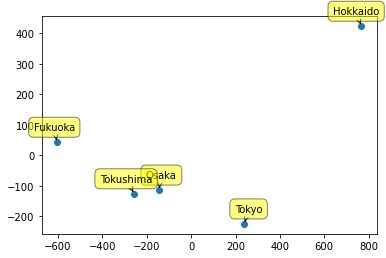

In [5]:
# labels for plot
labels = ["Tokyo", "Osaka", "Fukuoka", "Hokkaido", "Tokushima"]

# plot the data
plt.scatter(pos[:, 0], -pos[:, 1], marker = 'o')

# Annotate the data
for label, x, y in zip(labels, pos[:, 0], -pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (18, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()

---
# Second example
- Sampling some species from each site

## Create Data 

In [95]:
# Species data
species = [[120, 60, 120, 30, 50],
           [600, 720, 230, 400, 500],
           [50, 80, 20, 150, 200],
           [225, 230, 320, 20, 10],
           [1200, 2300, 500, 230,10],
           [600, 363, 150, 200 , 200]]
# label
labels = ["Site1", "Site2", "Site3", "Site4", "Site5"]
index = ["S_1", "S_2", "S_3", "S_4", "S_5", "S_6"]

In [97]:
# Arrange the data
species_df = pd.DataFrame(species, columns = labels, index = index)
species_val = species_df.values.T
species_df

,Site1,Site2,Site3,Site4,Site5
S_1,120,60,120,30,50
S_2,600,720,230,400,500
S_3,50,80,20,150,200
S_4,225,230,320,20,10
S_5,1200,2300,500,230,10
S_6,600,363,150,200,200


## Calculate the Bray curtis distance

In [89]:
# Calculate Bray Curtis dissimilarity matrix
from scipy.spatial import distance

def calc_braycurtis(data):
    # Declare a table and a array to preserve result
    table = {}
    bray_curtis = []
    num_site = len(data)

    # Create the bray curtis matrix
    for i in range(num_site) :
        current_dist = []
        for j in range(num_site):
            if  not (i,j) in table or (j,i) in table:
                table[(i,j)] = distance.braycurtis(data[i],data[j])
                table[(j,i)] = table[(i,j)]
            current_dist.append(table[(i,j)])
        bray_curtis.append(current_dist)
    return bray_curtis

In [90]:
bray_curtis = calc_braycurtis(species_val)
pd.DataFrame(bray_curtis)

,0,1,2,3,4
0,0.000000,0.237019,0.397823,0.513725,0.564409
1,0.237019,0.000000,0.532692,0.598578,0.640059
2,0.397823,0.532692,0.000000,0.426160,0.593074
3,0.513725,0.598578,0.426160,0.000000,0.200000
4,0.564409,0.640059,0.593074,0.200000,0.000000


## Create the NMDS class
- metric : 
    - True (default) => parametric
    - False => non-parametric

In [19]:
mds = manifold.MDS(n_components=2, 
                   dissimilarity = "precomputed",
                   metric = False,
                   random_state = 6)

## Apply NMDS

In [20]:
pos = mds.fit_transform(bray_curtis)

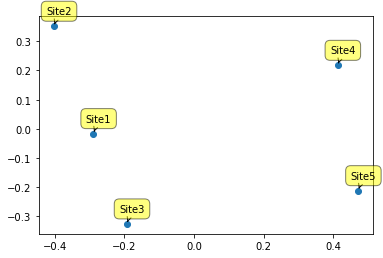

In [21]:
plt.scatter(pos[:, 0], -pos[:, 1], marker = 'o')

for label, x, y in zip(labels, pos[:, 0], -pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (18, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()

---
# Export the data to use at R

In [17]:
species_df.to_csv("./species_data.csv", index = False)

---
## Create Random data for second example

In [84]:
def create_data(row,column):
    columns = ["Site"+str(i) for i in range(column)]
    index = ["Specie_"+str(i) for i in range(row)]
    result = np.empty((row,column))
    for i in range(row):
        criterion = np.random.randint(1000)
        value_array = criterion * np.random.rand(column)
        result[i] = value_array.astype(int)
    return pd.DataFrame(result, columns = columns, index = index)

In [88]:
np.random.seed(seed=32)
#create_data(45,15).to_csv("./random_data.csv")

In [114]:
np.random.seed(seed=32)
random_data = create_data(45,15)
labels = random_data.columns

In [110]:
bray_curtis = calc_braycurtis(random_data.values.T)
pd.DataFrame(bray_curtis)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.408603,0.373148,0.381395,0.398181,0.322749,0.285117,0.270057,0.416655,0.348542,0.420656,0.381633,0.352954,0.437819,0.425223
1,0.408603,0.000000,0.293055,0.383232,0.384176,0.373347,0.341623,0.348802,0.371295,0.340990,0.443596,0.311500,0.384225,0.394830,0.304055
2,0.373148,0.293055,0.000000,0.367020,0.372292,0.336250,0.357915,0.365335,0.336537,0.354732,0.304020,0.310345,0.354269,0.305292,0.324856
3,0.381395,0.383232,0.367020,0.000000,0.268564,0.312194,0.335122,0.319655,0.335336,0.274602,0.326031,0.323222,0.308979,0.326513,0.272590
4,0.398181,0.384176,0.372292,0.268564,0.000000,0.319153,0.378101,0.327887,0.277090,0.272493,0.324220,0.235591,0.333014,0.330018,0.305579
5,0.322749,0.373347,0.336250,0.312194,0.319153,0.000000,0.321707,0.243605,0.361288,0.227048,0.343751,0.274682,0.306637,0.402851,0.312585
6,0.285117,0.341623,0.357915,0.335122,0.378101,0.321707,0.000000,0.261305,0.338956,0.301184,0.415104,0.348831,0.333967,0.375169,0.361878
7,0.270057,0.348802,0.365335,0.319655,0.327887,0.243605,0.261305,0.000000,0.271125,0.262503,0.345427,0.252520,0.314418,0.397742,0.361654
8,0.416655,0.371295,0.336537,0.335336,0.277090,0.361288,0.338956,0.271125,0.000000,0.321534,0.357939,0.296892,0.345910,0.311817,0.340101
9,0.348542,0.340990,0.354732,0.274602,0.272493,0.227048,0.301184,0.262503,0.321534,0.000000,0.312977,0.259226,0.284089,0.321896,0.263879


In [111]:
mds = manifold.MDS(n_components=2, 
                   dissimilarity = "precomputed",
                   metric = False,
                   random_state = 6)

In [112]:
pos = mds.fit_transform(bray_curtis)

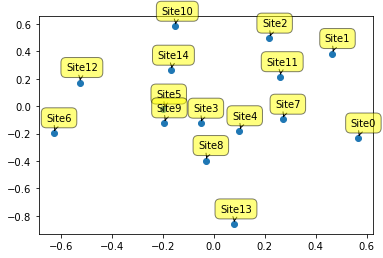

In [115]:
plt.scatter(pos[:, 0], -pos[:, 1], marker = 'o')

for label, x, y in zip(labels, pos[:, 0], -pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (18, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()